# Machine Learning Analysis for Early Detection of Heart Failure

## Import data

In [1]:
"""
Data Preprocessing Script
Author: deng.wei
Date: 3.27
Function: Preprocess the heart disease dataset, including handling outliers, categorical encoding, feature standardization, and data splitting.
"""
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import os
from IPython.display import display


data_file = os.path.join(os.getcwd(), '..','data', 'heart.csv')
print(os.getcwd())

# Check if the data file exists
if not os.path.exists(data_file):
    display(f"Data file not found: {data_file}")
else:
    try:
        # Load the dataset into a pandas DataFrame
        data = pd.read_csv(data_file)
        # Expected shape is (918, 12)
        print(f"Data loaded successfully, shape: {data.shape}")  
    except Exception as e:
        # Handle any errors that occur during the file loading process
        display(f"Error loading data: {e}")


/Users/dengwei/DSML/feature_implementation
Data loaded successfully, shape: (918, 12)


---
## Preprocessing

In [2]:
"""
Data Preprocessing Script
Author: deng.wei
Date: 3.27
Function: Preprocessing the heart disease dataset
"""
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import os
from IPython.display import display


# Handling outliers
'''
deng.wei: Blood pressure and cholesterol should not be zero
'''
bp_zero_count = (data['RestingBP'] == 0).sum()
chol_zero_count = (data['Cholesterol'] == 0).sum()
data['RestingBP'] = data['RestingBP'].replace(0, data['RestingBP'].median())
data['Cholesterol'] = data['Cholesterol'].replace(0, data['Cholesterol'].median())
print("Outlier handling completed")
print(f"Outlier handling: Replaced {bp_zero_count} zero values in blood pressure, {chol_zero_count} zero values in cholesterol")

'''
yue.yao: Copy global data for EDA analysis
'''
eda_data = data.copy()

# Category encoding
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
print("Categorical feature encoding completed")

# Splitting dataset
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# First, split into training and temporary sets (80% for training, 20% for temporary)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Then, split the temporary set into validation and test sets (each 10% of the original data)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print(f"Dataset split completed:")
print(f"Training set {X_train.shape} ({len(X_train)/len(X):.1%})")
print(f"Validation set {X_val.shape} ({len(X_val)/len(X):.1%})")
print(f"Test set {X_test.shape} ({len(X_test)/len(X):.1%})")

# Standardizing numerical features
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()

# Standardizing the training set using its mean and standard deviation
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Standardizing the validation and test sets using the training set's mean and standard deviation
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Numerical feature standardization completed")


Outlier handling completed
Outlier handling: Replaced 1 zero values in blood pressure, 172 zero values in cholesterol
Categorical feature encoding completed
Dataset split completed:
Training set (734, 11) (80.0%)
Validation set (92, 11) (10.0%)
Test set (92, 11) (10.0%)
Numerical feature standardization completed


---
## Dataset Persistence

In [3]:
"""
Dataset Persistence
Author: deng.wei
Date: 4.15
"""
# Combine features and labels for export
train_full = X_train.copy()
train_full["HeartDisease"] = y_train

val_full = X_val.copy()
val_full["HeartDisease"] = y_val

# Not include the reult in test data
test_full = X_test.copy()

# Create 'data_dir' folder if it doesn't exist
data_dir = os.path.join(os.getcwd(), '..', 'data')
os.makedirs(data_dir, exist_ok=True)


# Define output paths
train_path = os.path.join(data_dir, f"train_set_snapshot_.csv")
val_path   = os.path.join(data_dir, f"val_set_snapshot_.csv")
test_path  = os.path.join(data_dir, f"test_set_snapshot_.csv")

# Save datasets to CSV
train_full.to_csv(train_path, index=False)
val_full.to_csv(val_path, index=False)
test_full.to_csv(test_path, index=False)

print("Dataset snapshots saved")
print(f"Training set: {train_path}")
print(f"Validation set: {val_path}")
print(f"Test set: {test_path}")


Dataset snapshots saved
Training set: /Users/dengwei/DSML/feature_implementation/../data/train_set_snapshot_.csv
Validation set: /Users/dengwei/DSML/feature_implementation/../data/val_set_snapshot_.csv
Test set: /Users/dengwei/DSML/feature_implementation/../data/test_set_snapshot_.csv


---
## Exploratory Data Analysis (EDA)

In [4]:
"""
Exploratory analysis of data(EDA)
Author: yue.yao
Date: 4.6
Function: Conduct exploratory analysis on heart disease datasets and complete data visualization
"""
import matplotlib.pyplot as plt
import seaborn as sns

# Global overview of data
eda_data.describe(include = 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.538126,240.581699,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,17.990127,53.982967,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,80.000000,85.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,214.000000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [5]:
# Detect null values
eda_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
# Detect duplicate data
eda_data.duplicated().sum()

0

In [7]:
# Overview the distribution of non-numerical data
for i in eda_data.columns:
  if eda_data[i].dtype == 'object':
    print(f'column : {i}')
    print(eda_data[i].value_counts())
    print('----------------------------')

column : Sex
Sex
M    725
F    193
Name: count, dtype: int64
----------------------------
column : ChestPainType
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
----------------------------
column : RestingECG
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
----------------------------
column : ExerciseAngina
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
----------------------------
column : ST_Slope
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
----------------------------


In [8]:
# Conduct correlation analysis on the numerical data
num_cor = eda_data.corr(numeric_only=True)
num_cor

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.263054,0.030979,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.263054,1.000000,0.090835,0.067896,-0.109771,0.174130,0.117798
Cholesterol,0.030979,0.090835,1.000000,-0.008045,0.026734,0.056731,0.042988
FastingBS,0.198039,0.067896,-0.008045,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.109771,0.026734,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.174130,0.056731,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.117798,0.042988,0.267291,-0.400421,0.403951,1.000000


<Axes: >

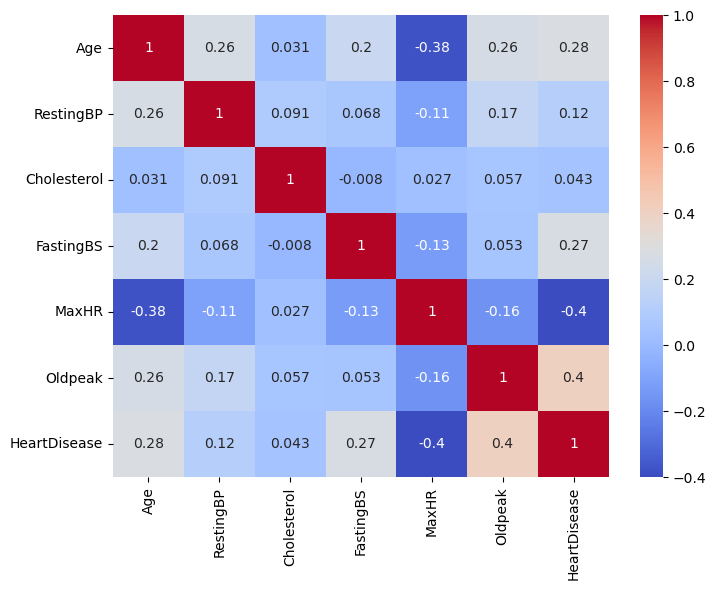

In [9]:
# Draw the correlation heat map
plt.figure(figsize=(8,6))
sns.heatmap(num_cor, annot=True, cmap='coolwarm')

> Conclusion:  
The data with high correlation with HeartDisease are Oldpeak, FastingBS, and Age

In [10]:
# Compare the average numerical distribution of Oldpeak for the diseased and non-diseased populations
print(eda_data.groupby('HeartDisease')['Oldpeak'].describe())

              count      mean       std  min  25%  50%  75%  max
HeartDisease                                                    
0             410.0  0.408049  0.699709 -1.1  0.0  0.0  0.6  4.2
1             508.0  1.274213  1.151872 -2.6  0.0  1.2  2.0  6.2


<Axes: xlabel='HeartDisease', ylabel='Oldpeak'>

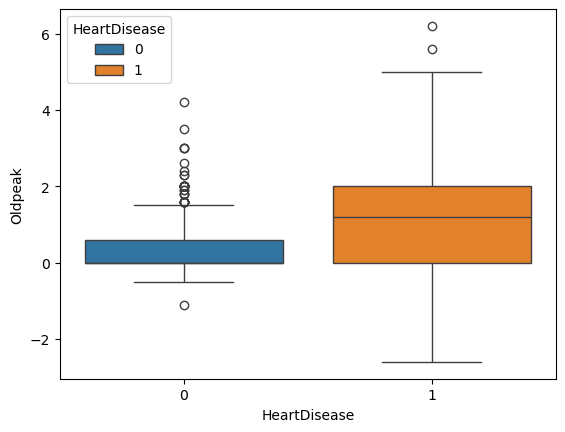

In [11]:
# Box plot comparison of Oldpeak value distribution
sns.boxplot(x='HeartDisease', y='Oldpeak', data=eda_data, hue='HeartDisease')

>  Conclusion:  
The Oldpeak index was generally higher in patients with heart failure than in non-patients, with values of 1.5 and above mostly distributed

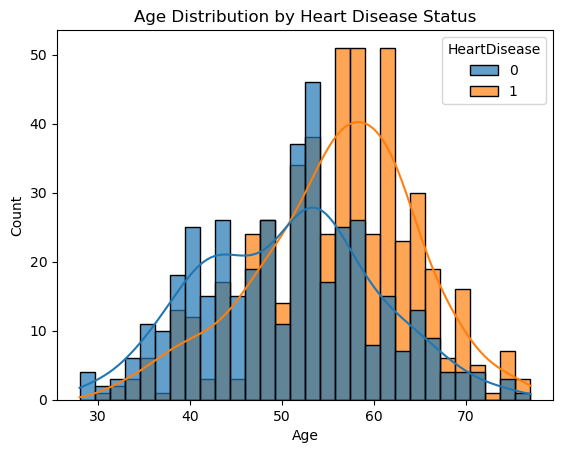

In [12]:
# The age distribution of patients and non-patients
sns.histplot(
    data=eda_data, 
    x='Age', 
    hue='HeartDisease',
    bins=30, 
    kde=True, 
    alpha=0.7
)
plt.title("Age Distribution by Heart Disease Status")
plt.show()

<Axes: xlabel='HeartDisease', ylabel='Age'>

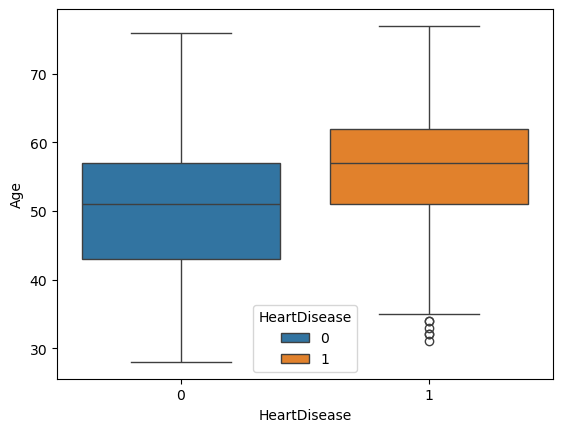

In [13]:
# The box plot compares the Age value distribution
sns.boxplot(x='HeartDisease', y='Age', data=eda_data, hue='HeartDisease')

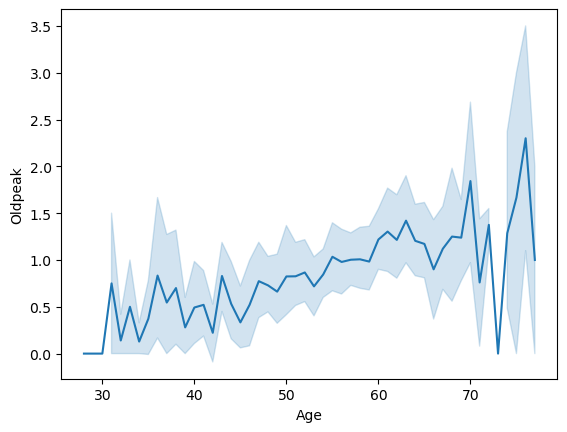

In [14]:
# Age-related changes in resting blood pressure
sns.lineplot(x='Age', y='Oldpeak', data=eda_data)
plt.show()

> Conclusion:  
Oldpeak value increases with age. The number of heart failure patients increases with age, and most patients are around 60 years old.

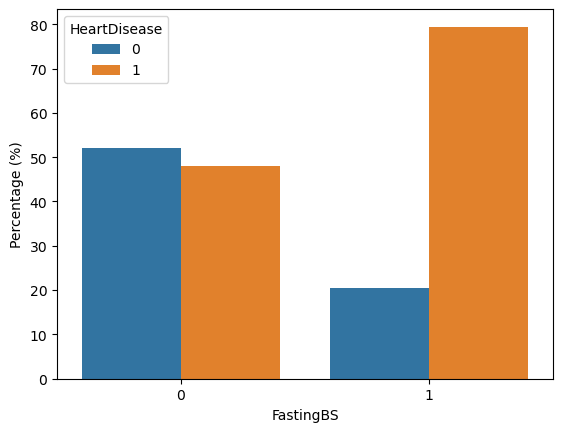

In [15]:
# Draw a proportional bar chart of the impact of FastingBS on illness
cross_tab = pd.crosstab(eda_data['FastingBS'], eda_data['HeartDisease'], normalize='index') * 100
cross_tab = cross_tab.reset_index().melt(id_vars='FastingBS', var_name='HeartDisease', value_name='Percentage')
sns.barplot(data=cross_tab, x='FastingBS', y='Percentage', hue='HeartDisease')
plt.xlabel("FastingBS")
plt.ylabel("Percentage (%)")
plt.show()

> Conclusion:  
Among patients with heart failure, the majority have a FastingBS value of 1, accounting for 80%

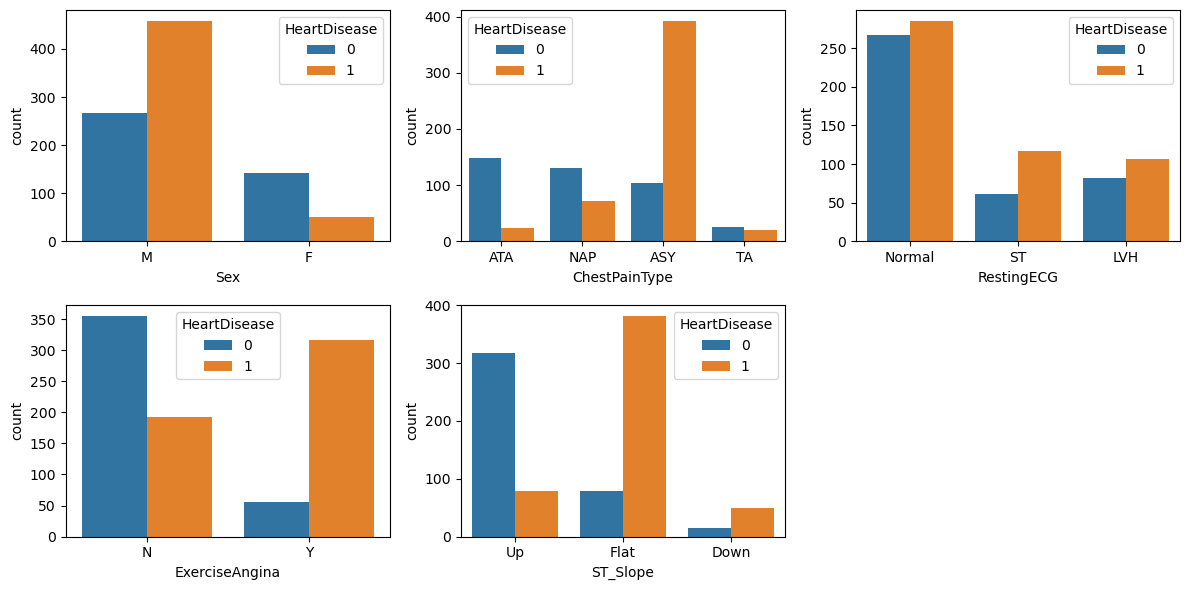

In [16]:
# The disease distribution of non-numerical data
categoricalfeatures = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
plt.figure(figsize=(12, 6))
for i in categoricalfeatures:
    ax = plt.subplot(2,3,categoricalfeatures.index(i)+1)
    sns.countplot(x= eda_data[i] , hue = eda_data['HeartDisease'])
plt.tight_layout()
plt.show()

>   Conclusion:  
1.Heart failure is more common in men and less common in women.  
2.Of the several types of chest pain, the largest number of patients showed no symptoms.  
3.RestingECG showed no significant difference in values between patients and non-patients.  
4.Exercise-induced angina pectoris accounted for a high proportion of patients.  
5.According to the value of ST_Slope, the ST curve of most patients is horizontal.

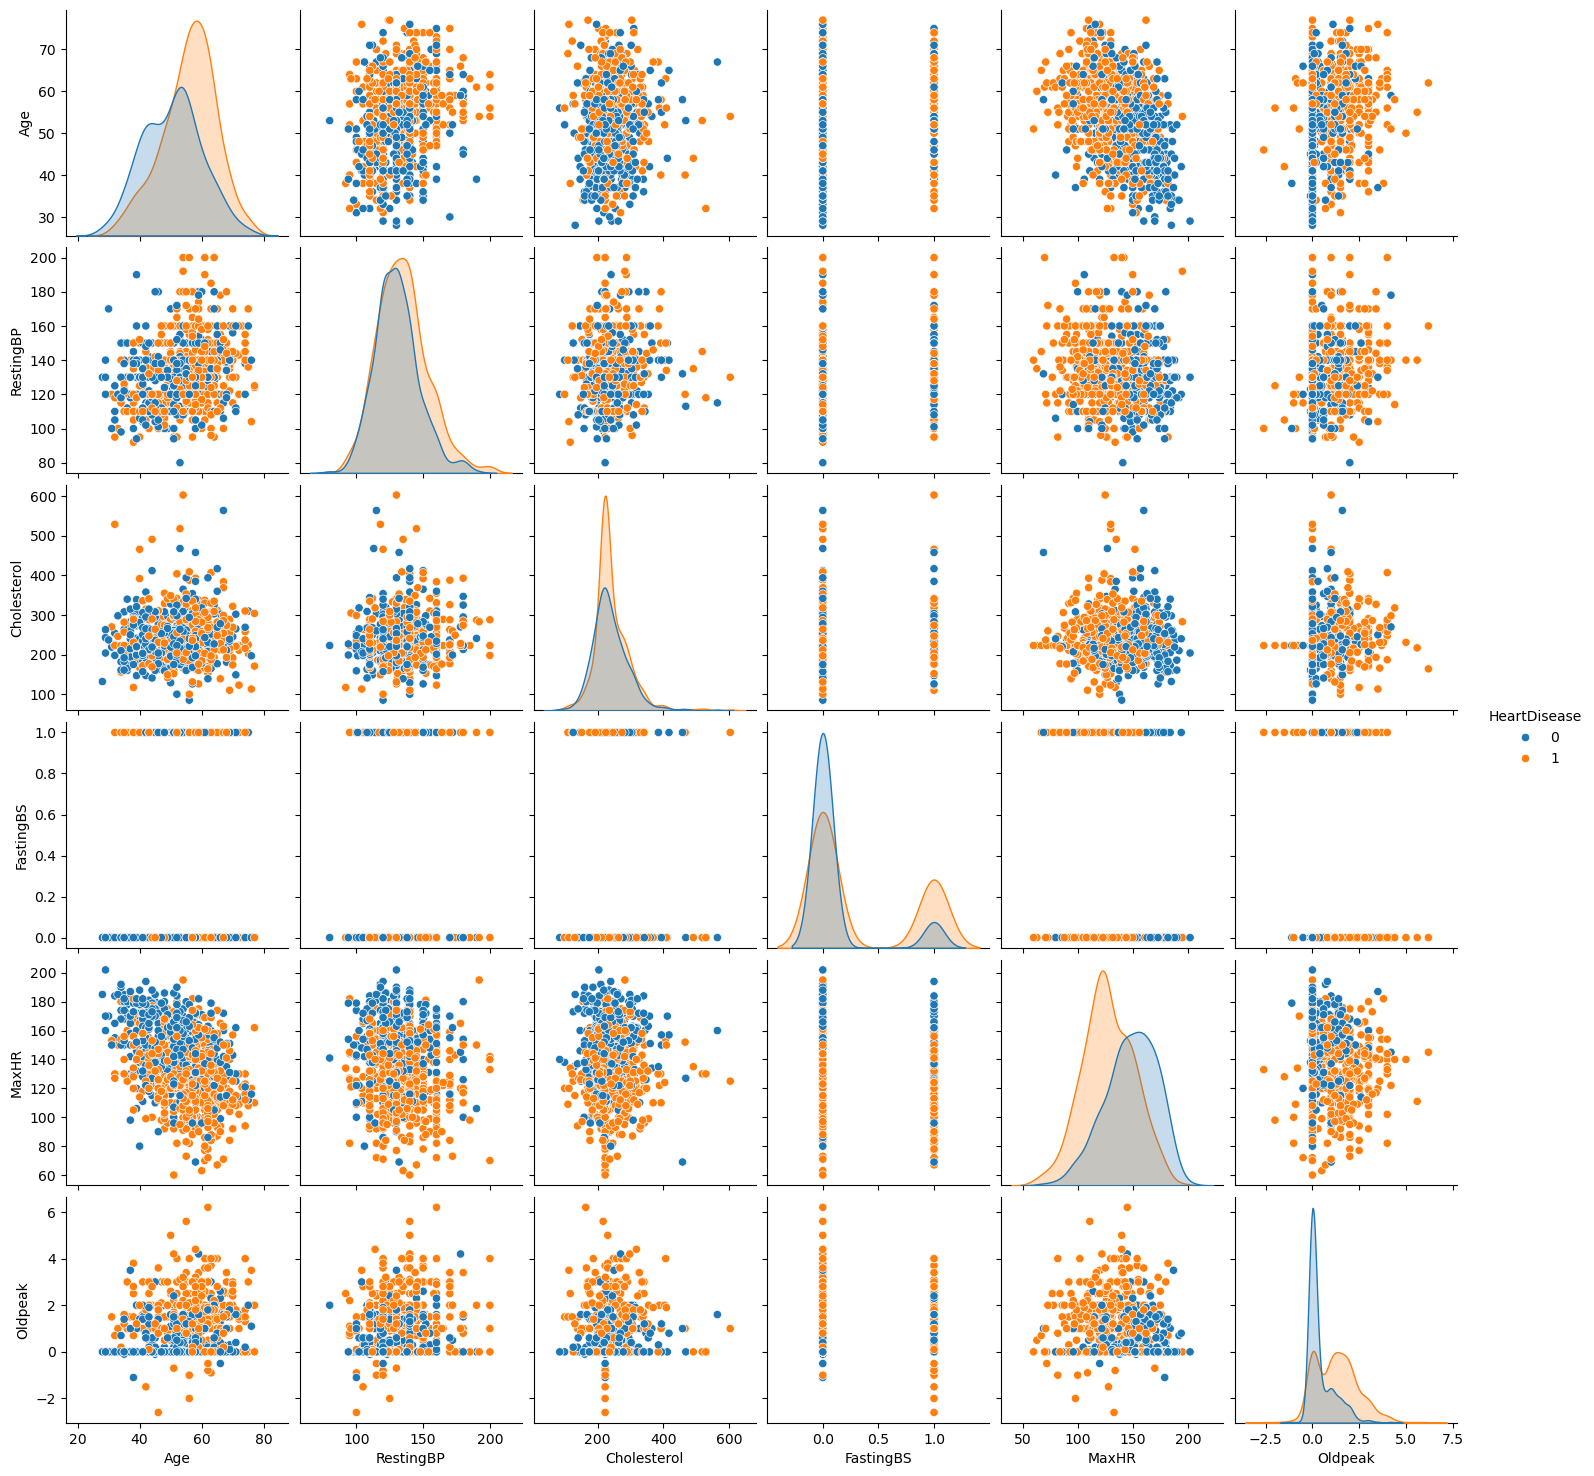

In [17]:
# Scatter plot matrix
sns.pairplot(eda_data,hue='HeartDisease')

> Conclusion:  
By analyzing the relationship between numerical class data, it can be seen that there is a clear type division between MaxHR and FastingBS. When the value of FastingBS is fixed, most patients are distributed within the range where MaxHR is lower than 160

---
## Model Analysis

### Public function

In [18]:
"""
Author: deng.wei
Date: 4.15
Function: To generate metrix images by elegant way
"""
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, title="Confusion Matrix", labels=["0", "1"]):
    """
    Function to plot confusion matrix.

    Parameters:
    cm : ndarray
        Confusion matrix to be plotted.
    title : str
        Title of the plot.
    labels : list
        List of labels for the confusion matrix (default is ["0", "1"]).
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [19]:
"""
Author: deng.wei
Date: 4.15
Function: To generate evaluation indicators by elegant way
"""
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score


def evaluate_model_basic(y_train, y_train_pred, y_test, y_test_pred):
    print("Training Set:")
    print(f"Accuracy     : {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Precision    : {precision_score(y_train, y_train_pred):.4f}")
    print(f"F1 Score     : {f1_score(y_train, y_train_pred):.4f}")
    print(f"Recall       : {recall_score(y_train, y_train_pred):.4f}")

    print("\nTest Set:")
    print(f"Accuracy     : {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Precision    : {precision_score(y_test, y_test_pred):.4f}")
    print(f"F1 Score     : {f1_score(y_test, y_test_pred):.4f}")
    print(f"Recall       : {recall_score(y_test, y_test_pred):.4f}")


In [20]:
"""
Author: yue.yao
Date: 4.19
Function: The scoring data stored in each model is used for the final comprehensive evaluation and comparison
"""
model_scores = {}

def save_model_scores(y_train, y_train_pred, y_test, y_test_pred, module_name, cv_mean, y_test_proba):
    """
    Function to save model evaluation scores

    Parameters:
    y_train : Training set label
    y_train_pred : Training set prediction labels
    y_test : Test set label
    y_test_pred : Test set prediction labels
    module_name : The name of the machine learning model currently being tested
    cv_mean : Cross-validation result
    y_test_proba : The latest prediction result of the current model
    """
    model_scores[module_name] = {
        # Test set index
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred),
        # Training set index
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Train Precision": precision_score(y_train, y_train_pred),
        "Train Recall": recall_score(y_train, y_train_pred),
        "Train F1": f1_score(y_train, y_train_pred),
        # Optional: Cross-validation (if any)
        "CV Mean Accuracy": cv_mean,
        "y_test_proba": y_test_proba
    }

### 1.KNN 


Best K value from GridSearchCV: 18
Training Set:
Accuracy     : 0.8624
Precision    : 0.8692
F1 Score     : 0.8767
Recall       : 0.8842

Test Set:
Accuracy     : 0.8587
Precision    : 0.8654
F1 Score     : 0.8738
Recall       : 0.8824


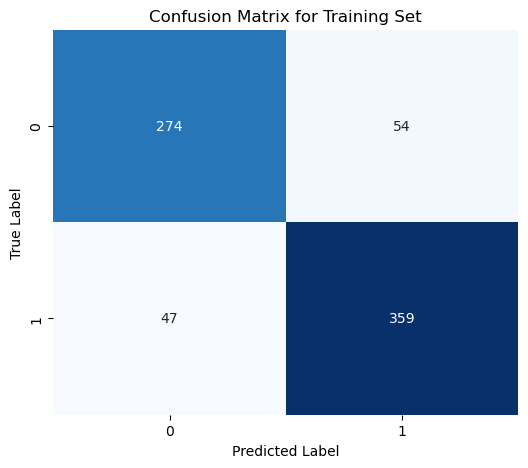

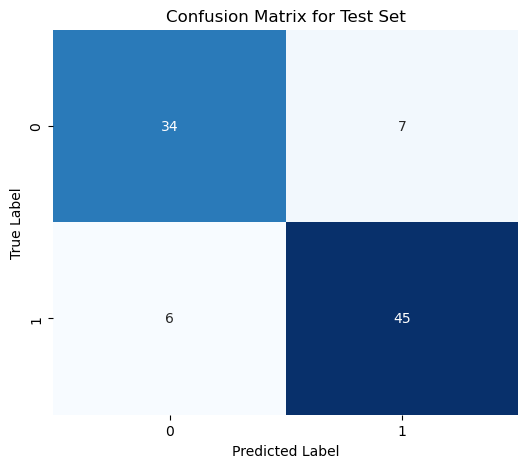

In [21]:
"""
KNN Model
Author: deng.wei
Date: 4.14
Function: KNN model implementation and evaluation
"""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 20)  # Tune n_neighbors
}

model_scores = {}
# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Initialize GridSearchCV on validation set
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val, y_val)  # Use validation set for tuning

# Get the best hyperparameters from GridSearchCV
best_k = grid_search.best_params_['n_neighbors']
print(f"\nBest K value from GridSearchCV: {best_k}")

# Retrain the model with the best hyperparameters using training set
knn_best = grid_search.best_estimator_
knn_best.fit(X_train, y_train)  # Train on training set

# Predictions with the best model 
y_train_pred_best = knn.predict(X_train)
y_test_pred_best = knn.predict(X_test)

# Evaluate the model using public evaluation function
evaluate_model_basic(y_train, y_train_pred_best, y_test, y_test_pred_best)

# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred_best)
cm_test = confusion_matrix(y_test, y_test_pred_best)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")

# Save model scores
save_model_scores(y_train, y_train_pred_best, y_test, y_test_pred_best, "KNN", None, knn_best.predict_proba(X_test)[:, 1])

### 2.Decision Tree


Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Training Set:
Accuracy     : 0.8542
Precision    : 0.8863
F1 Score     : 0.8651
Recall       : 0.8448

Test Set:
Accuracy     : 0.8370
Precision    : 0.8750
F1 Score     : 0.8485
Recall       : 0.8235


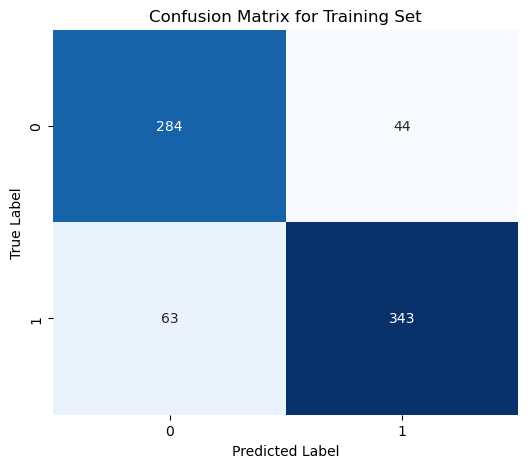

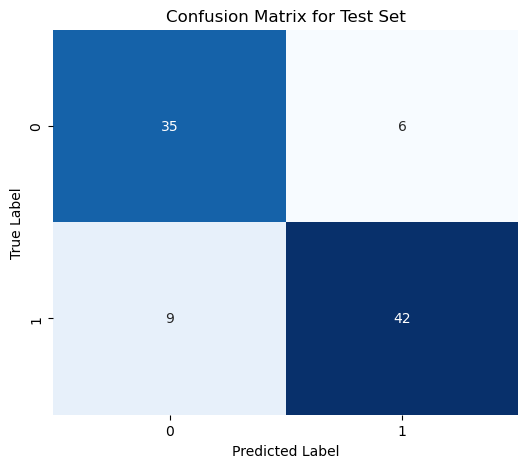

In [22]:
"""
Decision Tree Model
Author: deng.wei
Date: 4.14
Function: Decision Tree model implementation and evaluation
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],     # Tune max_depth
    'min_samples_split': [2, 5, 10],  # Tune min_samples_split
    'min_samples_leaf': [1, 2, 5]     # Tune min_samples_leaf
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val, y_val)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"\nBest Hyperparameters: {best_params}")

# Retrain model with the best hyperparameters
dt_best = grid_search.best_estimator_
dt_best.fit(X_train, y_train)

# Predictions on training and test set
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Evaluate the model using the evaluation function
evaluate_model_basic(y_train, y_train_pred, y_test, y_test_pred)

# Plot confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")

# Save model scores
save_model_scores(y_train, y_train_pred, y_test, y_test_pred, "Decision Tree", None, dt_best.predict_proba(X_test)[:, 1])

### 3.Random Forest


Best Hyperparameters from GridSearchCV: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 10}
Training Set:
Accuracy     : 0.9128
Precision    : 0.9091
F1 Score     : 0.9223
Recall       : 0.9360

Test Set:
Accuracy     : 0.8478
Precision    : 0.8246
F1 Score     : 0.8704
Recall       : 0.9216


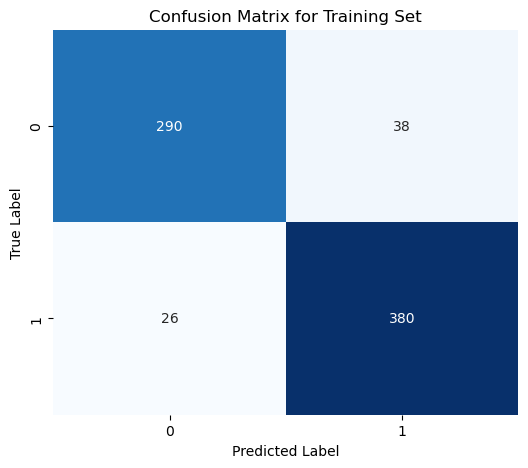

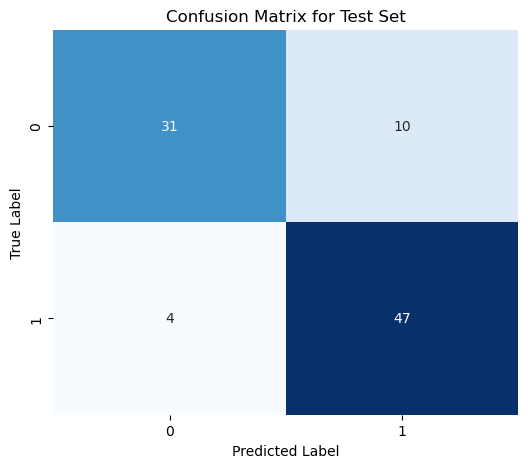

In [24]:
"""
Random Forest Model
Author: deng.wei
Date: 4.14
Function: Random Forest model implementation and evaluation
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


# Hyperparameter tuning using GridSearchCV on validation set
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val, y_val)  # Use validation set for tuning

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print(f"\nBest Hyperparameters from GridSearchCV: {best_params}")

# Retrain the model with the best hyperparameters using the training set
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)  # Train on training set

# Predictions with the best model
y_train_pred_best = rf_best.predict(X_train)
y_test_pred_best = rf_best.predict(X_test)

# Evaluate the model with best hyperparameters using the public evaluation function
evaluate_model_basic(y_train, y_train_pred_best, y_test, y_test_pred_best)

# Confusion matrices for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred_best)
cm_test = confusion_matrix(y_test, y_test_pred_best)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")

# Save model scores
save_model_scores(y_train, y_train_pred_best, y_test, y_test_pred_best, "Random Forest", grid_search.best_score_, rf_best.predict_proba(X_test)[:, 1]) 

### 4.Logistic Regression


Best Hyperparameters from GridSearchCV: {'C': 0.1, 'penalty': 'l2'}
Training Set:
Accuracy     : 0.8365
Precision    : 0.8505
F1 Score     : 0.8526
Recall       : 0.8547

Test Set:
Accuracy     : 0.8370
Precision    : 0.8333
F1 Score     : 0.8571
Recall       : 0.8824


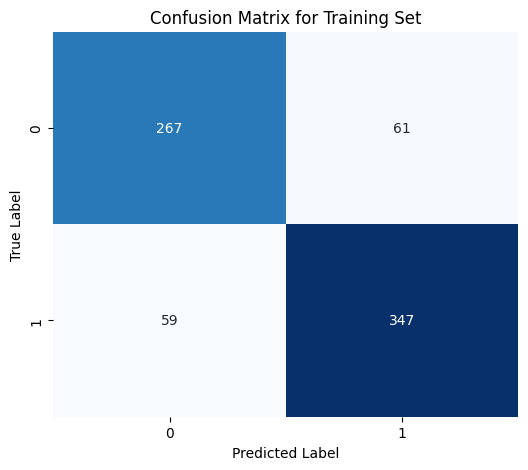

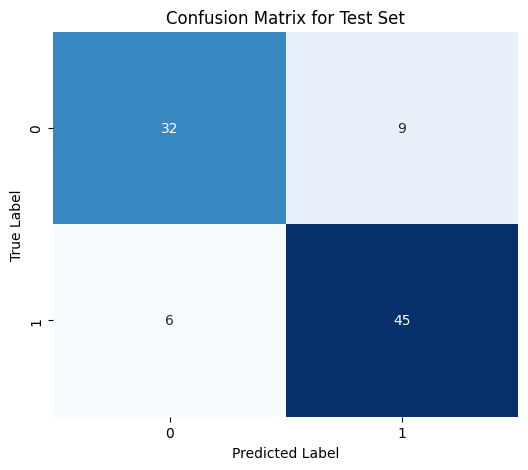

In [24]:
"""
Logistic Regression Model
Author: deng.wei
Date: 4.14
Function: Logistic Regression model implementation and evaluation
"""
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


# Hyperparameter tuning using GridSearchCV on validation set
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2']  # Regularization type
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val, y_val)  # Use validation set for tuning

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print(f"\nBest Hyperparameters from GridSearchCV: {best_params}")

# Retrain the model with the best hyperparameters using training set
log_reg_best = grid_search.best_estimator_
log_reg_best.fit(X_train, y_train)  # Train on training set

# Predictions with the best model
y_train_pred_best = log_reg_best.predict(X_train)
y_test_pred_best = log_reg_best.predict(X_test)

# Evaluate the model with best hyperparameters using public evaluation function
evaluate_model_basic(y_train, y_train_pred_best, y_test, y_test_pred_best)

# Confusion matrices for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred_best)
cm_test = confusion_matrix(y_test, y_test_pred_best)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")

# Save model scores
save_model_scores(y_train, y_train_pred_best, y_test, y_test_pred_best, "Logistic Regression", grid_search.best_score_, log_reg_best.predict_proba(X_test)[:, 1])

### 5.SVM


Best Hyperparameters from GridSearchCV: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Training Set:
Accuracy     : 0.8815
Precision    : 0.8789
F1 Score     : 0.8948
Recall       : 0.9113

Test Set:
Accuracy     : 0.8696
Precision    : 0.8679
F1 Score     : 0.8846
Recall       : 0.9020


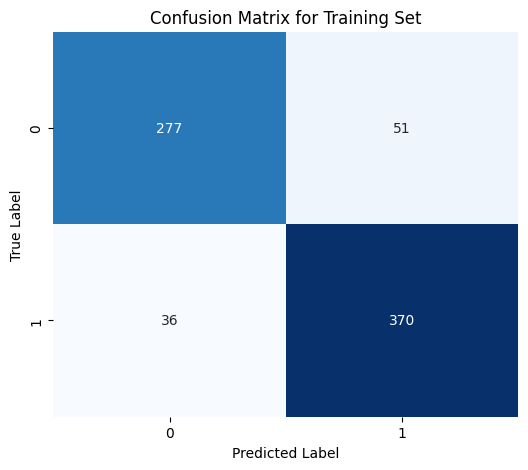

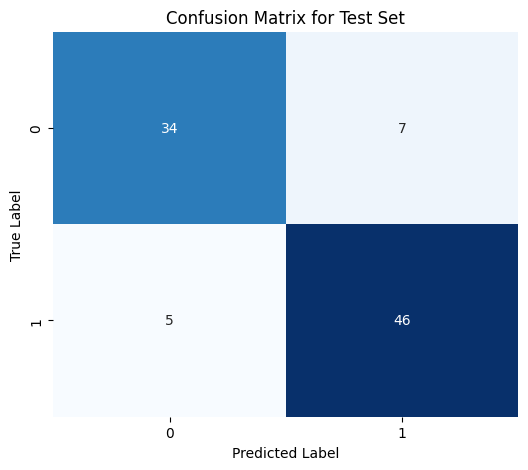

In [25]:
"""
SVM Model  
Author: deng.wei  
Date: 4.14  
Function: Implementation and evaluation of the SVM model
"""
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


# Hyperparameter tuning using GridSearchCV on validation set
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val, y_val)  # Use validation set for tuning

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print(f"\nBest Hyperparameters from GridSearchCV: {best_params}")

# Retrain the model with the best hyperparameters using training set
svm_best = grid_search.best_estimator_
svm_best.fit(X_train, y_train)  # Train on training set

# Predictions with the best model
y_train_pred_best = svm_best.predict(X_train)
y_test_pred_best = svm_best.predict(X_test)

# Evaluate the model with best hyperparameters using public evaluation function
evaluate_model_basic(y_train, y_train_pred_best, y_test, y_test_pred_best)

# Confusion matrices for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred_best)
cm_test = confusion_matrix(y_test, y_test_pred_best)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")

# Save model scores
save_model_scores(y_train, y_train_pred_best, y_test, y_test_pred_best, "SVM", grid_search.best_score_, svm_best.predict_proba(X_test)[:, 1])

### 6.Naive Bayes


Best Hyperparameters from GridSearchCV: {'var_smoothing': 1e-09}
Training Set:
Accuracy     : 0.8351
Precision    : 0.8645
F1 Score     : 0.8482
Recall       : 0.8325

Test Set:
Accuracy     : 0.9022
Precision    : 0.9038
F1 Score     : 0.9126
Recall       : 0.9216


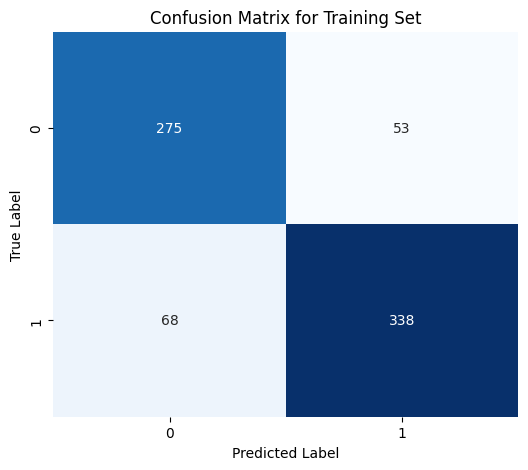

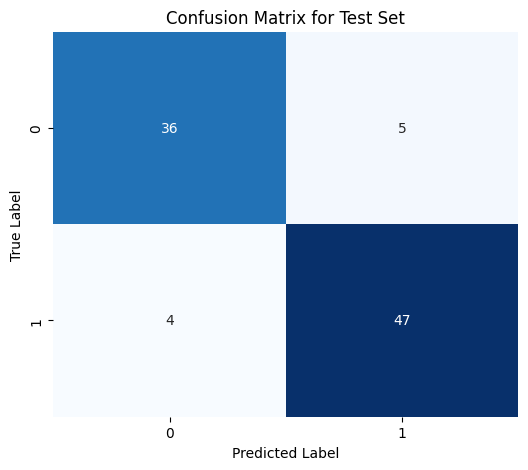

In [26]:
"""
Naive Bayes Model  
Author: deng.wei  
Date: 4.14  
Function: Implementation and evaluation of the Naive Bayes model
"""
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


# Hyperparameter tuning using GridSearchCV on validation set
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # Tuning the smoothing parameter
}

grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val, y_val)  # Use validation set for tuning

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print(f"\nBest Hyperparameters from GridSearchCV: {best_params}")

# Retrain the model with the best hyperparameters using training set
nb_best = grid_search.best_estimator_
nb_best.fit(X_train, y_train)  # Train on training set

# Predictions with the best model
y_train_pred_best = nb_best.predict(X_train)
y_test_pred_best = nb_best.predict(X_test)

# Evaluate the model with best hyperparameters using public evaluation function
evaluate_model_basic(y_train, y_train_pred_best, y_test, y_test_pred_best)

# Confusion matrices for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred_best)
cm_test = confusion_matrix(y_test, y_test_pred_best)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")

# Save model scores
save_model_scores(y_train, y_train_pred_best, y_test, y_test_pred_best, "Naive Bayes", grid_search.best_score_, nb_best.predict_proba(X_test)[:, 1])

### 7.Neural Network


Best Hyperparameters from GridSearchCV: {'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1}
Training Set:
Accuracy     : 0.9033
Precision    : 0.8960
F1 Score     : 0.9144
Recall       : 0.9335

Test Set:
Accuracy     : 0.8370
Precision    : 0.8214
F1 Score     : 0.8598
Recall       : 0.9020

Cross-validation accuracy scores on training data: [0.82993197 0.86394558 0.82993197 0.85034014 0.79452055]
Mean cross-validation accuracy: 0.8337


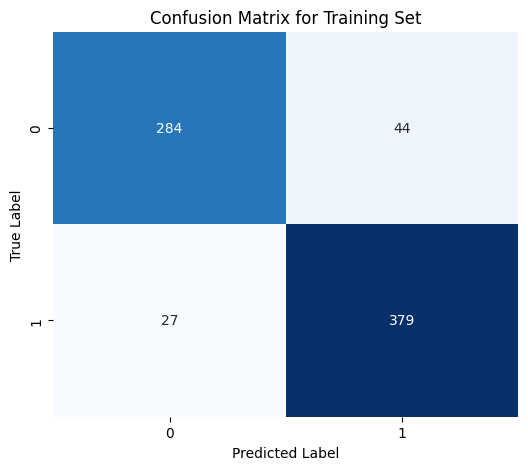

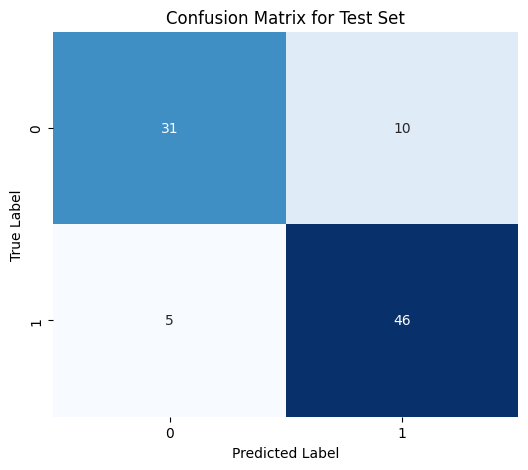

In [27]:
"""
Neural Network Model  
Author: deng.wei  
Date: 4.14  
Function: Implementation and evaluation of a neural network model
"""
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Convert to numpy array to avoid feature name warning
X_train = X_train.values
X_test = X_test.values

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],  # Different network architectures
    'alpha': [0.0001, 0.001, 0.01, 0.1],           # Regularization strength (L2 regularization)
    'learning_rate_init': [0.001, 0.01, 0.1]       # Learning rate
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(MLPClassifier(max_iter=1000, early_stopping=True, random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)  # Use training set for hyperparameter tuning

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print(f"\nBest Hyperparameters from GridSearchCV: {best_params}")

# Retrain the model with the best hyperparameters
mlp_best = grid_search.best_estimator_
mlp_best.fit(X_train, y_train)

# Predictions with the best model
y_train_pred_best = mlp_best.predict(X_train)
y_test_pred_best = mlp_best.predict(X_test)

# Evaluate the model with best hyperparameters using public evaluation function
evaluate_model_basic(y_train, y_train_pred_best, y_test, y_test_pred_best)

# Cross-validation scores on training data
cross_val_scores = cross_val_score(mlp_best, X_train, y_train, cv=5)
print(f"\nCross-validation accuracy scores on training data: {cross_val_scores}")
print(f"Mean cross-validation accuracy: {cross_val_scores.mean():.4f}")

# Confusion matrices for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred_best)
cm_test = confusion_matrix(y_test, y_test_pred_best)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")

# Save model scores
save_model_scores(y_train, y_train_pred_best, y_test, y_test_pred_best, "Neural Network", cross_val_scores.mean(), mlp_best.predict_proba(X_test)[:, 1])

### 8.Gradient Descent 


Best Hyperparameters from GridSearchCV: {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l2'}
Training Set:
Accuracy     : 0.8488
Precision    : 0.8520
F1 Score     : 0.8655
Recall       : 0.8793

Test Set:
Accuracy     : 0.8370
Precision    : 0.8333
F1 Score     : 0.8571
Recall       : 0.8824

Cross-validation accuracy scores on training data: [0.89795918 0.87755102 0.85034014 0.82993197 0.79452055]
Mean cross-validation accuracy: 0.8501


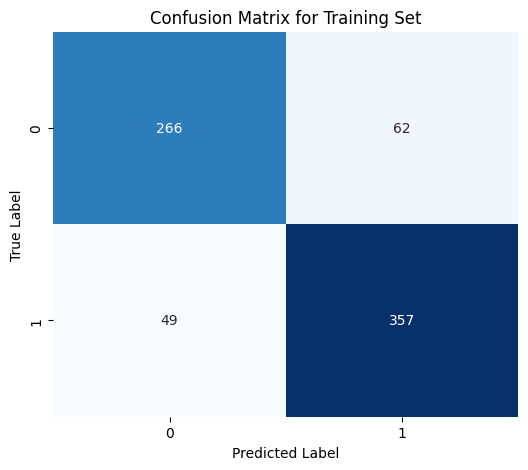

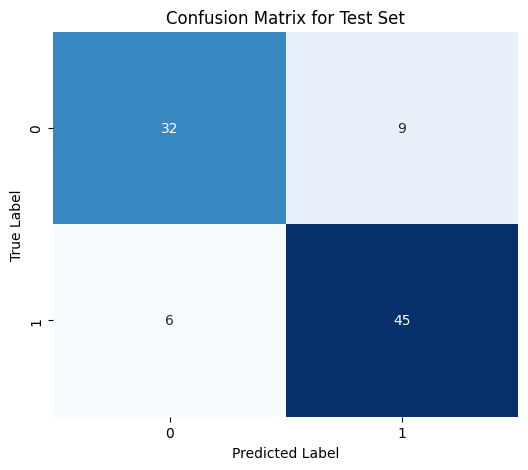

In [28]:
"""
Gradient Descent Model  
Author: deng.wei  
Date: 4.15  
Function: Implementation and evaluation of a gradient-based model
"""
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Hyperparameter tuning using GridSearchCV
param_grid = {
    'loss': ['log_loss', 'hinge', 'perceptron'],  # Corrected loss function
    'alpha': [0.0001, 0.001, 0.01, 0.1],    # Regularization strength (L2 regularization)
    'penalty': ['l2', 'l1', 'elasticnet'],   # Type of regularization
    'learning_rate': ['constant', 'optimal', 'invscaling'],  # Learning rate schedule
    'eta0': [0.001, 0.01, 0.1]               # Learning rate initialization, must be > 0
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(SGDClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)  # Use training set for hyperparameter tuning

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print(f"\nBest Hyperparameters from GridSearchCV: {best_params}")

# Retrain the model with the best hyperparameters
sgd_best = grid_search.best_estimator_
sgd_best.fit(X_train, y_train)

# Predictions with the best model
y_train_pred_best = sgd_best.predict(X_train)
y_test_pred_best = sgd_best.predict(X_test)
y_test_score = sgd_best.decision_function(X_test)

# Evaluate the model with best hyperparameters using public evaluation function
evaluate_model_basic(y_train, y_train_pred_best, y_test, y_test_pred_best)

# Cross-validation scores on training data
cross_val_scores = cross_val_score(sgd_best, X_train, y_train, cv=5)
print(f"\nCross-validation accuracy scores on training data: {cross_val_scores}")
print(f"Mean cross-validation accuracy: {cross_val_scores.mean():.4f}")

# Confusion matrices for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred_best)
cm_test = confusion_matrix(y_test, y_test_pred_best)
plot_confusion_matrix(cm_train, title="Confusion Matrix for Training Set")
plot_confusion_matrix(cm_test, title="Confusion Matrix for Test Set")

# Save model scores
save_model_scores(y_train, y_train_pred_best, y_test, y_test_pred_best, "Gradient Descent", cross_val_scores.mean(), y_test_score)


---
## Model Evaluation

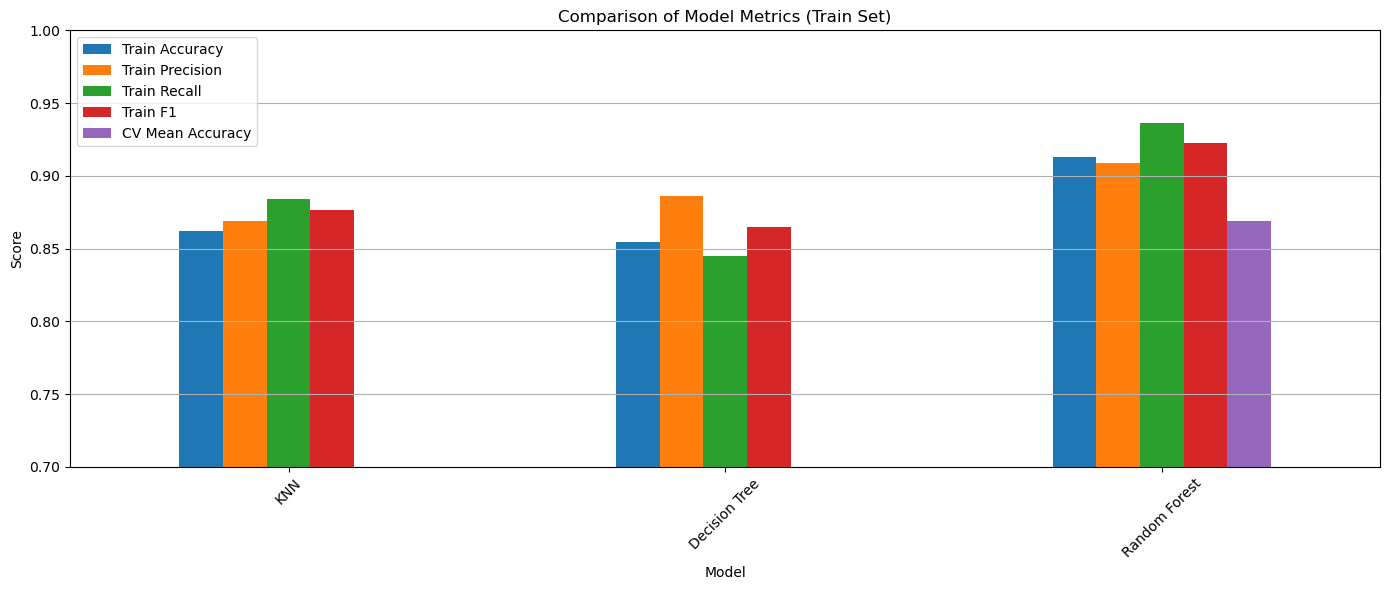

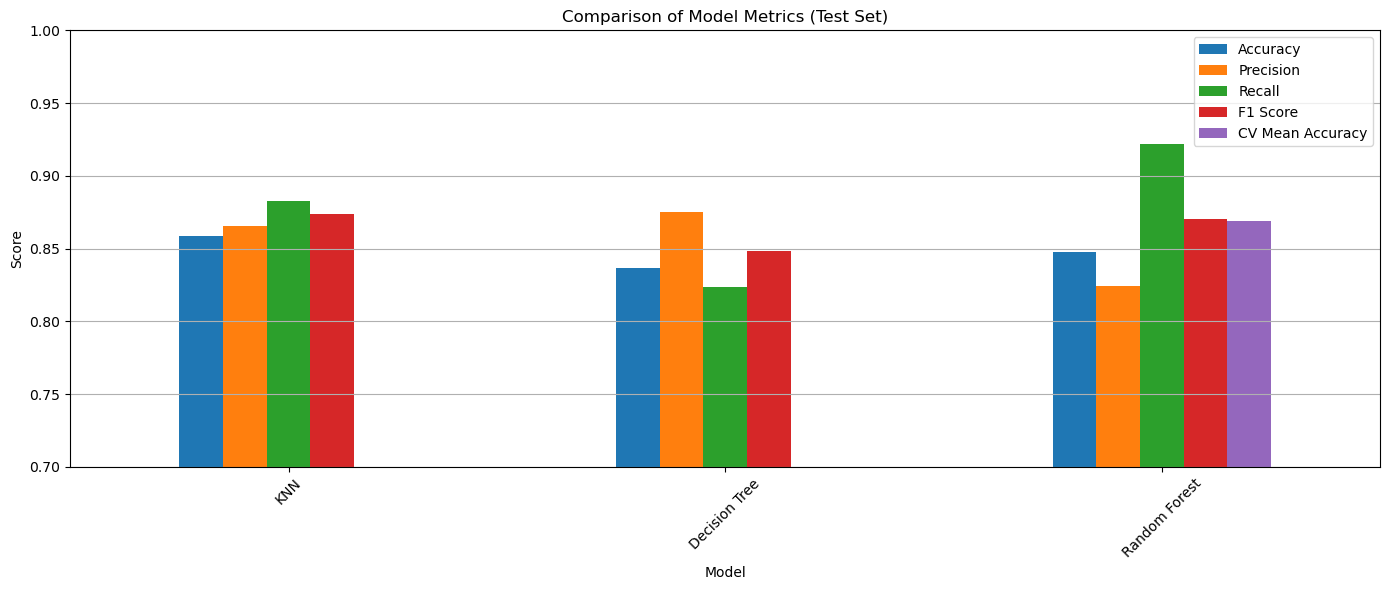

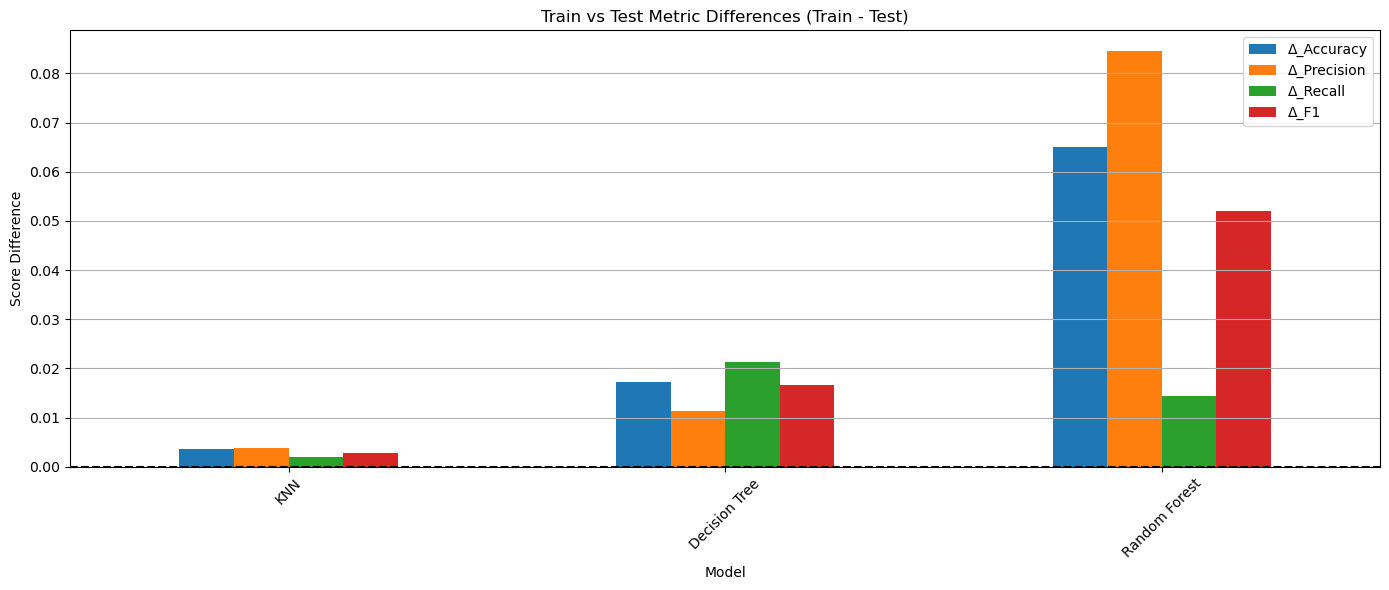

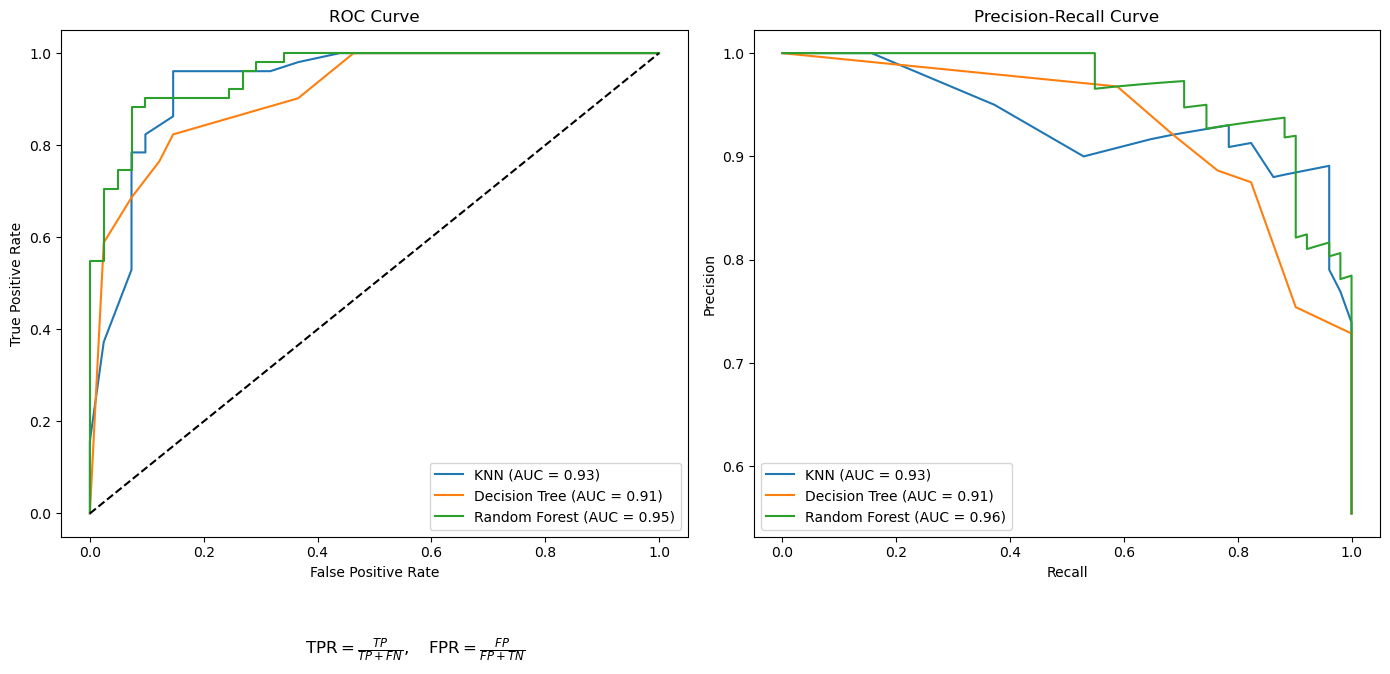

In [25]:
"""
Evaluation 
Author: guangsai li, xianda xu , yue yao 
Date: 4.18  
Function: Model Evaluation
"""
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc


for name, scores in model_scores.items():
    if "y_test_proba" in scores:
        scores["ROC AUC"] = roc_auc_score(y_test, scores["y_test_proba"])
        scores["PR AUC"] = average_precision_score(y_test, scores["y_test_proba"])
# change to DataFrame
df_models = pd.DataFrame(model_scores).T
df_models.index.name = "Model"    

# Train metrics
# Enable future behavior (Prohibit silent downgrading)
pd.set_option('future.no_silent_downcasting', True)
# Explicitly convert data types
train_metrics = df_models[
    ["Train Accuracy", "Train Precision", "Train Recall", "Train F1", "CV Mean Accuracy"]
].fillna(0).infer_objects(copy=False)
# Make sure that index is the model name
train_metrics.index = df_models.index
train_metrics.plot(kind="bar", figsize=(14, 6))
plt.title("Comparison of Model Metrics (Train Set)")
plt.ylabel("Score")
plt.ylim(0.7, 1.0)
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.tight_layout()
plt.show()

# Test metrics
test_metrics = df_models[
    ["Accuracy", "Precision", "Recall", "F1 Score", "CV Mean Accuracy"]
]
# Make sure that index is the model name
test_metrics.index = df_models.index  
test_metrics.plot(kind="bar", figsize=(14, 6))
plt.title("Comparison of Model Metrics (Test Set)")
plt.ylabel("Score")
plt.ylim(0.7, 1.0)
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.tight_layout()
plt.show()

# Calculate the training-test difference (used to determine whether there is overfitting)
df_models["Δ_Accuracy"] = df_models["Train Accuracy"] - df_models["Accuracy"]
df_models["Δ_Precision"] = df_models["Train Precision"] - df_models["Precision"]
df_models["Δ_Recall"] = df_models["Train Recall"] - df_models["Recall"]
df_models["Δ_F1"] = df_models["Train F1"] - df_models["F1 Score"]

# Draw the difference plot
fig, ax = plt.subplots(figsize=(14, 6))
df_models[["Δ_Accuracy", "Δ_Precision", "Δ_Recall", "Δ_F1"]].plot(kind="bar", ax=ax)
plt.axhline(0, color="black", linestyle="--")
plt.title("Train vs Test Metric Differences (Train - Test)")
plt.ylabel("Score Difference")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

def plot_roc_pr_curves(model_scores, y_test):
    plt.figure(figsize=(14, 6))
    # ROC Curve
    plt.subplot(1, 2, 1)
    for name, scores in model_scores.items():
        if "y_test_proba" in scores:
            fpr, tpr, _ = roc_curve(y_test, scores["y_test_proba"])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.figtext(
    0.3, -0.1,
    r"$\mathrm{TPR} = \frac{TP}{TP + FN}, \quad \mathrm{FPR} = \frac{FP}{FP + TN}$",
    ha='center', fontsize=12
)
    # PR Curve
    plt.subplot(1, 2, 2)
    for name, scores in model_scores.items():
        if "y_test_proba" in scores:
            precision, recall, _ = precision_recall_curve(y_test, scores["y_test_proba"])
            pr_auc = average_precision_score(y_test, scores["y_test_proba"])
            plt.plot(recall, precision, label=f"{name} (AUC = {pr_auc:.2f})")
    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()

    plt.tight_layout()
    plt.show()
    
# Execute the drawing method
plot_roc_pr_curves(model_scores, y_test)

---
## Final Conclusion: Random Forest as the Best Model

In this disease prediction task, Random Forest has been selected as the most appropriate model after comprehensive evaluation. It is particularly suitable for medical scenarios where minimizing false negatives (missed diagnoses) is critical. The decision is based on the following aspects:

### 1. Outstanding Detection Ability: High Recall and AUC Scores
- Test set Recall = 0.8824: effectively identifies the majority of actual positive (sick) cases, minimizing missed diagnoses.
- PR AUC = 0.95: highest among all models, making it highly suitable for imbalanced medical classification.
- ROC AUC = 0.94: demonstrates strong overall discriminative power.

### 2. High Stability and Generalization
- Moderate differences between training and testing metrics indicate no severe overfitting.
- Cross-validation mean accuracy = 0.8487, closely aligned with the test set performance, indicating consistent behavior across data splits.

### 3. Balanced Overall Performance
- Precision ≈ 0.84: low false positive rate, high prediction reliability.
- F1 Score ≈ 0.86: well-balanced trade-off between precision and recall.
- All major classification metrics are consistently high, demonstrating robustness.

### 4. Optimal Balance Between Sensitivity, Stability, and Overall Performance
- While other models (e.g., SVM, Decision Tree) have high recall, they exhibit larger train-test gaps.
- Models like Gradient Descent show stability but underperform in classification strength.
- Random Forest achieves top scores in all critical medical evaluation dimensions, making it the most balanced and reliable choice.

**Conclusion**: For high-risk medical prediction tasks that emphasize minimizing missed diagnoses, Random Forest is the most recommended model based on its excellent recall, stability, and comprehensive performance.


## Predict result

In [30]:
# Conduct result prediction after selecting the appropriate model